In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
w_img = h_img = 198

def preprocess_image(img):
    # Load the image
#     img = image.load_img(img_path, color_mode="grayscale", target_size=(h_img, w_img))
    
    # Convert the image to numpy array
    
    img_array = image.img_to_array(img)
    
    # Normalize the image
    img_array = img_array / 255.0
    
    # Expand the dimensions of the image
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

1/1 [==============================] - 0s 148ms/step


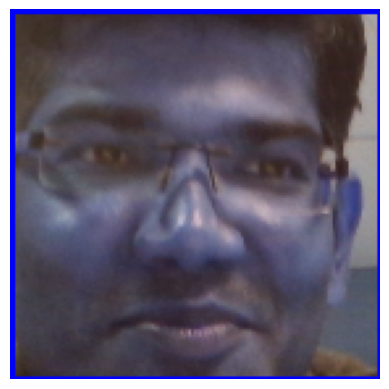

Age: 43
Race: Indian
Gender: Male


In [13]:
import cv2

face_cascade = cv2.CascadeClassifier('C:/Users/Tanny/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

img = 0
gray_img = 0

while True:
    # Read the frame from the camera
    _, img = cap.read()
    # Convert the frame to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

    # Draw a rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        img = img[y:y + h, x:x + w]
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('Face detection', img)
    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) == ord('q'):
        break
# Load the model
model = load_model("model_1.h5")

resized_img = cv2.resize(gray_img, (h_img, w_img))

img_array = preprocess_image(resized_img)

# Make predictions
preds = model.predict(img_array)

# Extract predictions
age = preds[0][0][0]

race_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']
race = race_labels[np.argmax(preds[1][0])]

gender_labels = ['Male', 'Female']
gender = gender_labels[np.argmax(preds[2][0])]

# Image Display
plt.imshow(img)
plt.axis('off')
plt.show()

# Print the age, race and gender
print("Age:", int(np.round(age*75)))
print("Race:", race)
print("Gender:", gender)

# Release the capture and destroy the window
cap.release()
cv2.destroyAllWindows()